<a href="https://colab.research.google.com/github/SukhmanpreetKaurManes/Loan_prediction/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [12]:
X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')
Y_test = pd.read_csv('Y_test.csv')

In [13]:
print(X_train.head())

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

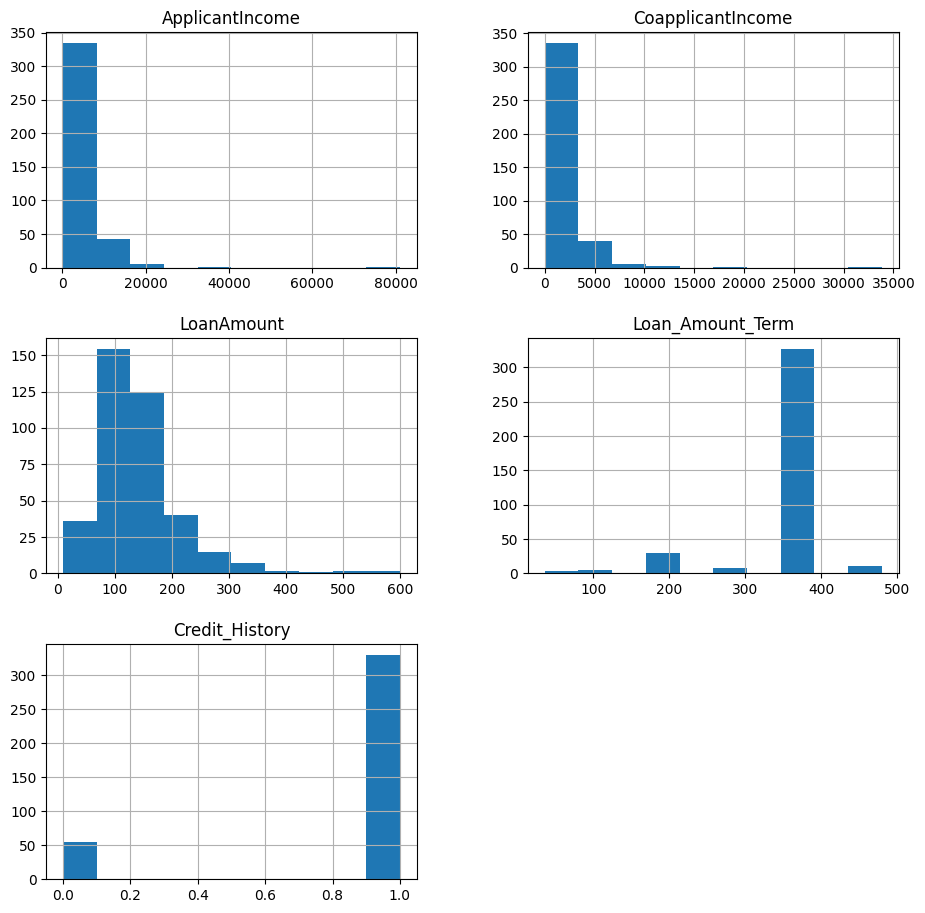

In [14]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [15]:
# Using .shape
print("Number of rows using .shape:", X_train.shape[0])

# Using len()
print("Number of rows using len():", len(X_train))

Number of rows using .shape: 384
Number of rows using len(): 384


In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
accuracy_score(Y_test,knn.predict(X_test_minmax))

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.75

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(penalty='l2',C=0.01)
logreg.fit(X_train_minmax, Y_train.values.ravel())

# Predict on the test set and calculate accuracy
accuracy_logreg = accuracy_score(Y_test.values.ravel(),logreg.predict(X_test_minmax))

print(f"Accuracy of Logistic Regression model: {accuracy_logreg}")

Accuracy of Logistic Regression model: 0.6354166666666666


In [19]:
# Standardizing the train and test data
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
# Fitting logistic regression on our standardized data set
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75

In [20]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_minmax, Y_train.values.ravel())

# Predict on the test set and calculate accuracy
accuracy_svm = accuracy_score(Y_test.values.ravel(), svm_model.predict(X_test_minmax))

print(f"Accuracy of SVM model: {accuracy_svm}")

Accuracy of SVM model: 0.7395833333333334


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in X_test.columns.values:
  if X_test[col].dtypes=='object':
    data=pd.concat([X_train[col], X_test[col]])
    le.fit(data.values)
    X_train[col]=le.transform(X_train[col])
    X_test[col]=le.transform(X_test[col])

In [22]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,13,1,0,0,0,0,4950,0.0,125,360,1,2
1,193,1,1,1,0,0,2882,1843.0,123,480,1,1
2,461,1,1,0,0,0,3000,3416.0,56,180,1,1
3,191,1,1,2,0,0,9703,0.0,112,360,1,2
4,300,1,1,0,0,0,2333,2417.0,136,360,1,2


In [23]:
# Standardizing the features
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting the logistic regression model
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
# Checking the models accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7395833333333334

In [25]:
# We are using scaled variable as we saw in previous section that
# scaling will effect the algo with l1 or l2 reguralizer
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting a logistic regression model
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7395833333333334

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
X_train_1=X_train
X_test_1=X_test
columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
          'Credit_History', 'Property_Area']
for col in columns:
       # creating an exhaustive list of all possible categorical values
       data=pd.concat([X_train[[col]], X_test[[col]]])
       enc.fit(data)
       # Fitting One Hot Encoding on train data
       temp = enc.transform(X_train[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp.toarray(),columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(X_train.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
       X_train_1=pd.concat([X_train_1,temp],axis=1)
       # fitting One Hot Encoding on test data
       temp = enc.transform(X_test[[col]])
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp.toarray(),columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(X_test.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       X_test_1=pd.concat([X_test_1,temp],axis=1)

In [31]:
# Standardizing the data set
X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)
# Fitting a logistic regression model
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75